<a href="https://colab.research.google.com/github/Collin-Campbell/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Chi2_Tests_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Practice Chi-square Tests

###Dataset description:

Slasher movies thrill audiences by portraying a lone antagonist (typically male) who attacks innocent victims with extreme violence and without apparent motive. However, this exciting (if gory) subgenre of horror film is criticized by those who view the violence as being used to “punish” female characters who engage in sexual activity during the film. To test this claim, study authors randomly sampled 50 North American slasher films released from 1960 to 2009 and coded the 485 characters appearing in them as being male or female, involved in sexual activity or not, and if they survived the film or not1. The data appears in the Slasher.csv dataset. In this project, we are going to answer a slightly simpler question: Are female characters in slasher films more likely to be "murdered" than male characters?

Source: A. Welsh (2010). "On the Perils of Living Dangerously in the Slasher Horror Film: Gender Differences in the Association Between Sexual Activity and Survival," Sex Roles, Vol. 62 pp. 762-773

You can find the Slasher.csv file here:

<https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv>





### 1) Load the Slasher.csv dataset in a new dataframe.



In [4]:
import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

print(df.shape)


(485, 4)


###2) Display the top 5 rows of the dataframe to take a look at the variable names and values.

In [7]:
df.head()

,ID,Gender,Activity,Survival
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1


The variable codes are:

ID = Character ID

Gender = Character gender.  0 = female, 1 = male

Activity = Character was portrayed as engaged in sexual activity.  0 = no, 1 = yes

Survival = Character survival in the film. 0 = did not survive, 1 = survived

###3) Calculate the frequency and relative frequency of male and female characters in this set of slasher films.  Describe your results in a sentence or two.

In [8]:
# Frequency of male and female characters 

Gender = pd.crosstab(index=df["Gender"], columns="count")

Gender

# Remember:  0=female, 1=male
# There are 263 female and 222 male characters
# in this set of slasher films.

col_0,count
Gender,
0,263
1,222


In [9]:
# Relative frequency of male and female characters

Gender/Gender.sum()*100

# Of all the characters in this set of slasher films,
# 54.23% are female and
# 45.77% are male.

col_0,count
Gender,
0,54.226804
1,45.773196


###4) Calculate the frequency and relative frequency of character survival in this set of slasher films.  Describe your results in a sentence or two.

In [10]:
# Frequency of character survival 

Survival = pd.crosstab(index=df["Survival"], columns="count")

Survival

# Remember:  0=did not survive, 1=survived
# There are 400 characters that did not survive 
# and 85 characters that did survive
# in this set of slasher films.

col_0,count
Survival,
0,400
1,85


In [11]:
# Relative frequency of character survival

Survival/Survival.sum()*100

# Of all the characters in this set of slasher films,
# 82.47% did not survive and
# 17.53% survived.

col_0,count
Survival,
0,82.474227
1,17.525773


###5) Calculate the joint distribution of character sex and movie survival. Add the table margins.  

Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [12]:
pd.crosstab(df['Gender'],df['Survival'])

Survival,0,1
Gender,,
0,228,35
1,172,50


In [13]:
pd.crosstab(df['Gender'],df['Survival'], margins=True)

# Based on the crosstab below, it appears that
# of the 400 characters that did not survive, 
# 228 were female and 172 were male.  
# Of the 85 characters that did survive, 
# 35 were female and 50 were male.

Survival,0,1,All
Gender,,,
0,228,35,263
1,172,50,222
All,400,85,485


###6) Calculate the distribution of survival conditional on character sex.
Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [14]:
pd.crosstab(df['Gender'],df['Survival'], normalize='index')*100

# Based on the distribution table below,
# 86.69% of females did not survive, while 
# 13.31% of females did survive.  Of the male
# characters, 77.48% did not survive, while
# 22.52% did survive.  

Survival,0,1
Gender,,
0,86.692015,13.307985
1,77.477477,22.522523


###7) Identify the appropriate null and alternative hypotheses to test for a statistically significant relationship between character sex and survival. 

**Ho:**  There is no relationship between gender and survival in the set of slasher films.

**Ha:**  There is a relationship between gender and survival in the set of slasher films.

### 8) Perform the chi-square test above using `stats.chi2_contingency()` and output the p-value.


In [15]:
from scipy.stats import chi2_contingency

g, p, dof, expctd = chi2_contingency(pd.crosstab(df['Gender'],df['Survival']))

print(p)

0.011104692591139975


### 9) Interpret your p-value in 8) at the 0.05 significance level, and summarize your results in a sentence or two.

In [ ]:
# The p value above (0.0111) is very small!  At the 0.05 significance level, we
# would reject the null hypothesis and, thus, conclude there is a relationship
# between gender and survival in the set of slasher films.  

### 10) Create a side-by-side bar plot to illustrate the relationship between character sex and survival in Slasher movies.  Sum up your overall results in a sentence or two.

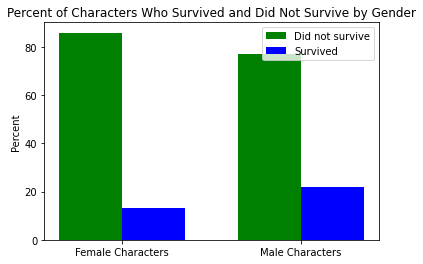

In [16]:
import matplotlib.pyplot as plt

N = 2 

Died = (86, 77) 
Survived = (13, 22) 

ind = np.arange(N)  
width = 0.35       

fig, ax = plt.subplots()
rects1 = ax.bar(ind, Died, width, color='g') 
rects2 = ax.bar(ind + width, Survived, width, color='b') 

ax.set_ylabel('Percent')
ax.set_title('Percent of Characters Who Survived and Did Not Survive by Gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Female Characters', 'Male Characters'))

ax.legend((rects1[0], rects2[0]), ('Did not survive', 'Survived'))

plt.show()

In [ ]:
# Based on the bar plot above,
# 86.69% of females did not survive, while 
# 13.31% of females did survive.  Of the male
# characters, 77.48% did not survive, while
# 22.52% did survive.

## Stretch Goals:

###1. Explore the concept of an odds ratio

Another way to quantify the relationship between two categorical variables is by calculating the odds ration, which is the ratio of the odds of an event happening in one group to the odds of the event happening in another group.

[Lots more about the odds ratio](https://en.wikipedia.org/wiki/Odds_ratio).

We can use Python to calculate the odds of surviving a slaser movie for female compared to male characters.

You can find more information about calculating the odds ratio for a 2x2 table in Python [here](https://www.statsmodels.org/stable/contingency_tables.html).  Scroll down to the section labeled "A Single 2x2 Table".

Calculate the odds ratio comparing the odds of movie survival in female compared to male characters.  Interpret what this number tells you about the likelihood of male and female characters surviving the film.


In [ ]:
# YOUR WORK HERE

Sum up your results in a sentence or two.


### 2. Learn about Simpson's Paradox

[Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox#:~:text=Simpson's%20paradox%2C%20which%20goes%20by,when%20these%20groups%20are%20combined.) occurs when a trend that appears in separate groups disappears or reverses when those groups are combined.  

Create a scenario where Hopsital A has a lower overall mortality rate than Hospital B but has a higher mortality rate if cases are separated into two groups: high risk and low risk.


In [ ]:
# YOUR WORK HERE

Sum up your results in a sentence or two.